In [109]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from PIL import Image 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pickle
import cv2

print(tf.__version__)

2.17.0


In [2]:
gpus = tf.config.list_physical_devices('GPU')
gpuid = 0 #int(args.gpu_id)                                                                                                                           
if gpus:                                                                          
  try:
    tf.config.set_visible_devices(gpus[gpuid], 'GPU')
    tf.config.set_logical_device_configuration(
        gpus[gpuid],
        [tf.config.LogicalDeviceConfiguration(memory_limit=8000)])
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized                                                                                   
    print(e)

1 Physical GPUs, 1 Logical GPUs


I0000 00:00:1736998230.033915  156782 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1736998230.056608  156782 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1736998230.058563  156782 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1736998230.061657  156782 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

In [13]:
def extract_data(path, intensity_list, label):
    data = []
    labels = []
    for i in range(len(intensity_list)):
    #for f in os.listdir(negative_path+"Intensity"):
        # get the intensity
        intensity_image = np.float32( Image.open(path + "Intensity/" + intensity_list[i]))
        down_samp = cv2.resize(intensity_image, (512,512), interpolation=cv2.INTER_LINEAR)
        reshaped_intensity = np.mean(down_samp, axis=-1) 
        image_array = np.expand_dims(reshaped_intensity, axis=-1)
        rescaled_array = image_array/255.0
        #print(rescaled_array.shape)   

        # get sobel values
        sobelx_values = cv2.Sobel(src=reshaped_intensity, ddepth=cv2.CV_64F ,dx=1,dy=0,ksize=7)
        sobelx_array = np.expand_dims(sobelx_values, axis=-1)
        max_sobel = np.max(sobelx_array)
        rescaled_sobel = sobelx_array/max_sobel

        # combine sobel and intensity
        combined_data = np.concatenate([rescaled_array,rescaled_sobel],axis=-1)
        data.append(combined_data)
        labels.append(rescaled_sobel)

    npdata = np.array(data)
    nprescaled_sobel = np.array(labels)
    
    return npdata,nprescaled_sobel


# initialize storage of data and labels for negative class
# Path to negative class
negative_path1 = 'Sheet 1/'
intensity_list = os.listdir(negative_path1+"Intensity")
data1,rescaled_sobel = extract_data(negative_path1,intensity_list,0.0)
print('success')

success


In [14]:
data1.shape

(731, 512, 512, 2)

In [15]:
rescaled_sobel.shape

(731, 512, 512, 1)

In [21]:
channel_1.shape

(731, 512, 512)

In [23]:
channel_2.shape

(731, 512, 512)

In [22]:
# this block tells us if the rescaled_sobel variable matches the channel extracted from the extract_data() function
channel_1 = data1[:, :, :, 0] #intensity
channel_2 = data1[:, :, :, 1] #sobel

if False in np.isclose(channel_2,rescaled_sobel.squeeze()):
    print("false")

In [24]:
channel_1.shape

(731, 512, 512)

In [25]:
rescaled_sobel.shape

(731, 512, 512, 1)

In [28]:
channel_2[0].shape

(512, 512)

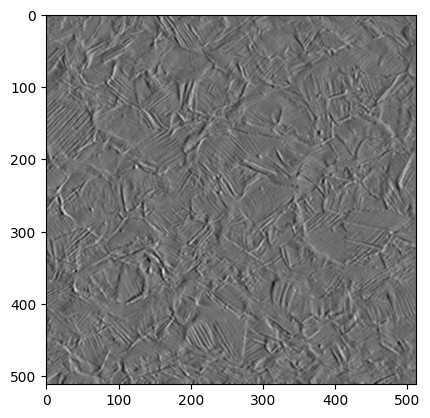

In [29]:
plt.imshow(channel_2[0], cmap='grey')

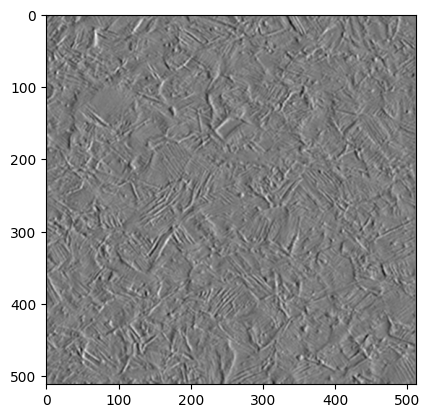

In [31]:
plt.imshow(rescaled_sobel, cmap='grey')

In [194]:
intensity_image = cv2.imread('Sheet_1_000_X001_Y001_G001_A001_I.tiff')
down_samp = cv2.resize(intensity_image, (512,512), interpolation=cv2.INTER_LINEAR)
reshaped_intensity = np.mean(down_samp, axis=-1) 
image_array = np.expand_dims(reshaped_intensity, axis=-1)
rescaled_array = image_array/255.0
#print(rescaled_array.shape)   

# get sobel values
sobelx_values = cv2.Sobel(src=down_samp, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5)
reshaped_sobel = np.mean(sobelx_values, axis=-1)
sobelx_array = np.expand_dims(reshaped_sobel, axis=-1)
max_sobel = np.max(reshaped_sobel)
min_sobel = np.min(reshaped_sobel)
rescaled_sobel = (sobelx_array-min_sobel)/(max_sobel-min_sobel)

# combine sobel and intensity
#combined_data = np.concatenate([rescaled_array,rescaled_sobel],axis=-1)

In [201]:
rescaled_array

array([[[0.62745098],
        [0.71764706],
        [0.74901961],
        ...,
        [0.35294118],
        [0.3254902 ],
        [0.38039216]],

       [[0.34509804],
        [0.24705882],
        [0.35686275],
        ...,
        [0.31372549],
        [0.34901961],
        [0.30196078]],

       [[0.55294118],
        [0.55294118],
        [0.60784314],
        ...,
        [0.34509804],
        [0.28235294],
        [0.25098039]],

       ...,

       [[0.51372549],
        [0.5254902 ],
        [0.53333333],
        ...,
        [0.49411765],
        [0.48627451],
        [0.45490196]],

       [[0.40392157],
        [0.43921569],
        [0.47058824],
        ...,
        [0.64313725],
        [0.67058824],
        [0.65098039]],

       [[0.42745098],
        [0.48235294],
        [0.53333333],
        ...,
        [0.63921569],
        [0.64313725],
        [0.62745098]]])

In [199]:
np.min(rescaled_array)

0.0

In [193]:
min_sobel

-6882.0

In [189]:
down_samp

array([[[160, 160, 160],
        [183, 183, 183],
        [191, 191, 191],
        ...,
        [ 90,  90,  90],
        [ 83,  83,  83],
        [ 97,  97,  97]],

       [[ 88,  88,  88],
        [ 63,  63,  63],
        [ 91,  91,  91],
        ...,
        [ 80,  80,  80],
        [ 89,  89,  89],
        [ 77,  77,  77]],

       [[141, 141, 141],
        [141, 141, 141],
        [155, 155, 155],
        ...,
        [ 88,  88,  88],
        [ 72,  72,  72],
        [ 64,  64,  64]],

       ...,

       [[131, 131, 131],
        [134, 134, 134],
        [136, 136, 136],
        ...,
        [126, 126, 126],
        [124, 124, 124],
        [116, 116, 116]],

       [[103, 103, 103],
        [112, 112, 112],
        [120, 120, 120],
        ...,
        [164, 164, 164],
        [171, 171, 171],
        [166, 166, 166]],

       [[109, 109, 109],
        [123, 123, 123],
        [136, 136, 136],
        ...,
        [163, 163, 163],
        [164, 164, 164],
        [160, 160, 160]]

In [172]:
sobelx_values

array([[[   0.,    0.,    0.],
        [ 854.,  854.,  854.],
        [ 754.,  754.,  754.],
        ...,
        [-240., -240., -240.],
        [ -66.,  -66.,  -66.],
        [   0.,    0.,    0.]],

       [[   0.,    0.,    0.],
        [ 627.,  627.,  627.],
        [ 784.,  784.,  784.],
        ...,
        [-359., -359., -359.],
        [-166., -166., -166.],
        [   0.,    0.,    0.]],

       [[   0.,    0.,    0.],
        [-365., -365., -365.],
        [ 165.,  165.,  165.],
        ...,
        [-465., -465., -465.],
        [-180., -180., -180.],
        [   0.,    0.,    0.]],

       ...,

       [[   0.,    0.,    0.],
        [ 607.,  607.,  607.],
        [ 376.,  376.,  376.],
        ...,
        [-291., -291., -291.],
        [-188., -188., -188.],
        [   0.,    0.,    0.]],

       [[   0.,    0.,    0.],
        [ 691.,  691.,  691.],
        [ 437.,  437.,  437.],
        ...,
        [-124., -124., -124.],
        [ -74.,  -74.,  -74.],
        [   0.,

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-6882.0..7351.0].


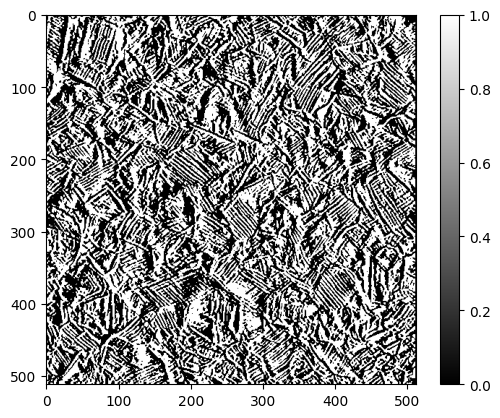

In [205]:
plt.imshow(sobelx_values, cmap='grey')
plt.colorbar()

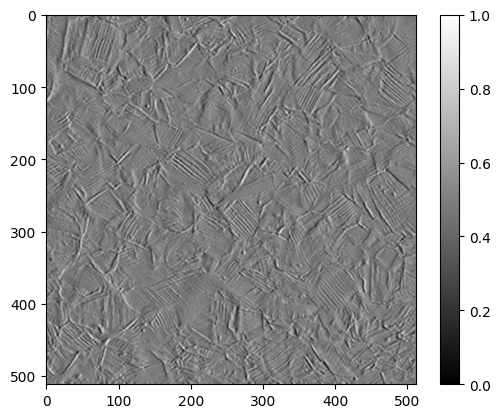

In [203]:
plt.imshow(rescaled_sobel, cmap='grey')
plt.colorbar()

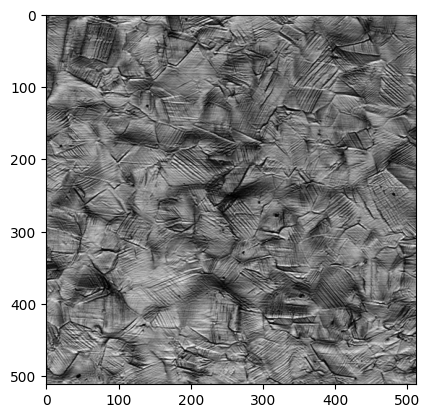

In [202]:
plt.imshow(down_samp, cmap='grey')

Making sure I combined height and intensity correctly

In [32]:
negative_path = 'Sheet 1/'
intensity_list = os.listdir(negative_path+"Intensity")
height_list = os.listdir(negative_path+"Height")

# initialize storage of data and labels
raw_height = []
scaled_height = []
for i in range(len(intensity_list)):
#for f in os.listdir(negative_path+"Intensity"):
    # get the intensity
    intensity_image = np.float32( Image.open(negative_path + "Intensity/" + intensity_list[i]))
    down_samp = cv2.resize(intensity_image, (512,512), interpolation=cv2.INTER_LINEAR)
    reshaped_intensity = np.mean(down_samp, axis=-1) 
    image_array = np.expand_dims(reshaped_intensity, axis=-1)
    rescaled_array = image_array/255.0
    #print(rescaled_array.shape)   

    # get heights
    raw_heights = pd.read_csv(negative_path+"Height/"+height_list[i],skiprows=18)
    raw_heights = raw_heights.drop(['DataLine','Unnamed: 1025'],axis=1)
    np_heights = np.array(raw_heights)
    down_heights = cv2.resize(np_heights, (512,512), interpolation=cv2.INTER_LINEAR)
    max_height = np.max(down_heights)
    exp_height = np.expand_dims(down_heights,axis=-1)
    #raw_height.append(exp_height)
    rescaled_height = exp_height/max_height
   # scaled_height.append(rescaled_height)

    #print(rescaled_height.shape)

    # combine height and intensity
    combined_data = np.concatenate([rescaled_array,rescaled_height],axis=-1)
    data0.append(combined_data)

print('success')

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
channel_1 = combined_data[:, :, 0] 
channel_2 = combined_data[:, :, 1]  

if False in np.isclose(channel_2,rescaled_height.squeeze()):
    print("false")

In [ ]:
sum(channel_2==rescaled_height.squeeze())
rescaled_height.squeeze()

In [ ]:
rescaled_array.squeeze()

In [ ]:
np.array(raw_height)

In [ ]:
raw_height = np.array(raw_height)
scaled_height = np.array(scaled_height)
plt.imshow(np.array(raw_height)[0],cmap='grey')
plt.colorbar()

In [ ]:
len(scaled_height[0])

In [ ]:
plt.imshow(scaled_height[0],cmap='grey')
plt.colorbar()